In [1]:
# Carregando as bibliotecas para realização da análise

import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt


In [3]:
# Importando o dataset sugerido. Opção de importar diretamente do site http://insideairbnb.com/get-the-data.html
# Transformando a base de dados em um dataframe pandas

df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-07-17/data/listings.csv.gz')

In [4]:
# Visualização rápida do cabeçalho do dataframe para conhecer melhor os atributos e tipos dos dados do dataset

df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210717121617,2021-07-17,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96599,-43.17940,Entire condominium,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Bed linens"", ""Hangers"", ""Cooking basics"", ""E...",$170.00,5,180,5,5,1125,1125,5.0,1125.0,NaN,t,19,49,79,317,2021-07-17,265,14,1,2011-03-30,2021-05-21,4.68,4.78,4.63,4.82,4.90,4.76,4.65,NaN,t,1,1,0,0,2.11
1,24480,https://www.airbnb.com/rooms/24480,20210717121617,2021-07-17,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\r\nI am a filmmaker and a tea...,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98405,-43.20189,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Bed linens"", ""First aid kit"", ""Hangers"", ""Es...",$283.00,3,90,3,3,90,90,3.0,90.0,NaN,t,0,0,0,154,2021-07-17,85,0,0,2013-08-20,2017-04-22,4.73,4.83,4.78,4.90,4.90,4.97,4.58,NaN,f,1,1,0,0,0.88
2,25026,https://www.airbnb.com/rooms/25026,20210717121617,2021-07-17,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",a few days or more,40%,21%,f,https://a0.muscache.com/im/pictures/user/9e204...,https://a0.muscache.com/im/pictures/user/9e204...,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.97735,-43.19105,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Cable TV"", ""Kitchen"", ""Hangers"", ""Long term 

In [5]:
# Conhecimento das dimensões do dataset
# Este dataset possui 23.635 instâncias e 74 atributos

df.shape

(23635, 74)

In [6]:
# Visualizando todos os atributos do dataset

df.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [7]:
# Através do resultado do código df.info() é possível conhecer além da descrição das variáveis, a presença 
# ou não de dados nulos e o tipo de dados para cada um dos atributos. Este conhecimento permitirá a correta 
# manipulação e tratamento dos dados no decorrer do estudo.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23635 entries, 0 to 23634
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23635 non-null  int64  
 1   listing_url                                   23635 non-null  object 
 2   scrape_id                                     23635 non-null  int64  
 3   last_scraped                                  23635 non-null  object 
 4   name                                          23614 non-null  object 
 5   description                                   22294 non-null  object 
 6   neighborhood_overview                         12824 non-null  object 
 7   picture_url                                   23635 non-null  object 
 8   host_id                                       23635 non-null  int64  
 9   host_url                                      23635 non-null 

In [ ]:
# Analisando alguns dos atributos do dataset.
# A fim de continuar a análise exploratória dos dados, foram escolhidas aleatoriamente alguns atributos para
# análise descritiva.
# 'property_type', 'room_type', 'review_scores_rating', 'review_scores_value', 'review_scores_location'

In [8]:
# Avaliando o atributo 'property_type', identificamos 87 diferentes tipos de classificação de tipos de propriedade,
# sendo a de maior ocorrência 'Entire apartment' com 13.255 registros, 'Private room in apartment' com 3.594,
# 'Entire condominium' com 1.340. Além disso as opções de tipo de propriedade com menores ofertas são 'Private room in tent'
# 'Shared room in townhouse', 'Shared room in cottage', 'Private room in cabin' e 'Shared rooom in bungalow', cada uma
# com apenas 1 opção, dentro deste dataset.

property_type = df.property_type.value_counts()
print(property_type)

Entire apartment             13255
Private room in apartment     3594
Entire condominium            1340
Private room in house         1097
Entire house                  1036
                             ...  
Shared room in bungalow          1
Treehouse                        1
Room in nature lodge             1
Dome house                       1
Private room in treehouse        1
Name: property_type, Length: 87, dtype: int64


In [9]:
# Avaliando o atributo 'room_type', observamos a ocorrência de 4 diferentes tipos de classificação, sendo elas:
# 'Entire home/apt', 'Private room', 'Shared room' e 'Hotel room'. 'Entire home/apt' representa a classificação
# com maior número de registros, 17.172, seguido de 'Private room' com 5.841, 'Shared room' com 532 e 'Hotem room'
# com 90 unidades registradas neste dataset.

df.room_type.value_counts()

Entire home/apt    17172
Private room        5841
Shared room          532
Hotel room            90
Name: room_type, dtype: int64

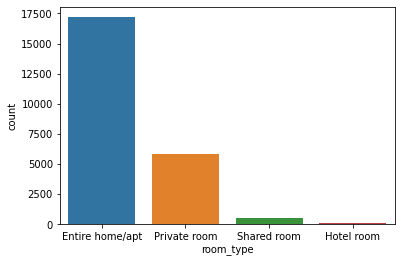

In [10]:
# Um gráfico de barras pode ser plotado como fim ilustrativo de comparação visual entre as ocorrências das classes
# room type

sns.countplot(x='room_type', data=df)

In [11]:
# Em sequência, vamos analisar a variável 'review_scores_rating', a qual representa uma variável considerada importante
# para o cliente durante a tomada de decisão de escolha de acomodações.
# Para este dataset, apenas 14.980 acomodações possuem este tipo de avaliação. Os demais valores encontram-se como NaN.

df.review_scores_rating.unique()

array([4.68, 4.73, 4.72, 4.9 , 4.62, 4.88, 4.33, 4.57, 4.75, 5.  , 4.38,
       4.  , 4.89, 4.64, 4.76, 4.27, 4.32, 4.78, 4.7 , 4.67, 4.58,  nan,
       4.47, 4.59, 4.66, 4.74, 4.82, 4.92, 4.55, 4.71, 4.61, 4.85, 3.33,
       4.99, 4.93, 4.53, 4.87, 4.94, 3.  , 4.2 , 4.77, 4.96, 4.86, 4.97,
       4.8 , 4.5 , 4.41, 0.  , 4.95, 4.81, 4.84, 4.79, 4.48, 4.83, 4.14,
       4.91, 4.6 , 3.71, 4.65, 4.63, 4.22, 4.29, 4.09, 4.25, 4.46, 4.11,
       4.52, 4.43, 4.28, 4.44, 4.69, 4.4 , 4.42, 4.26, 3.86, 4.51, 3.5 ,
       4.45, 4.34, 4.54, 4.36, 4.17, 3.67, 4.3 , 2.6 , 4.56, 4.37, 4.15,
       4.31, 4.19, 2.5 , 4.21, 4.35, 4.18, 4.98, 4.13, 4.39, 1.  , 3.8 ,
       4.1 , 2.67, 3.75, 4.24, 4.06, 2.  , 2.25, 3.89, 3.88, 4.08, 4.49,
       4.23, 3.2 , 3.43, 1.75, 3.7 , 3.83, 3.6 , 3.25, 1.5 , 3.64, 4.07,
       2.33, 4.16, 3.94, 2.75, 3.14, 3.9 , 1.33, 2.4 , 3.17])

In [12]:
# Através da função describe é possível realizar algumas observações sobre estes dados: O maior valor de avaliação foi 5,
# enquanto que o menor foi 0. A média das avaliações é 4,577, e a mediana 4,88. A proximidade entre média e mediana
# sugerem um certo agrupamento dos dados, enquanto que o baixo desvio padrão indica uma baixa dispersão ou espalhamento
# dos mesmos.

df.review_scores_rating.describe()

count    14980.000000
mean         4.577253
std          0.961930
min          0.000000
25%          4.630000
50%          4.880000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


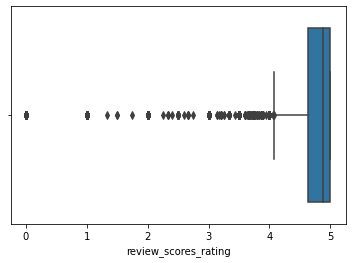

In [13]:
# Um boxplot desta variável auxilia a visualização da distribuição das avaliações, em complemento com os dados estatísticos
# mencionados acima.

scores_rating = df.review_scores_rating
sns.boxplot(scores_rating)

In [ ]:
# Para finalizar o overview de alguns dos atributos, seguiremos analisando as avaliações 'review_scores_rating', 
# 'review_scores_value', 'review_scores_location'

In [14]:
df.review_scores_value.unique()

array([4.65, 4.58, 4.56, 4.87, 4.44, 4.93, 3.67, 4.6 , 4.57, 4.75, 4.33,
       4.23, 5.  , 4.78, 4.74, 4.24, 4.76, 4.62, 4.  ,  nan, 4.59, 4.48,
       4.77, 4.54, 4.7 , 4.43, 4.52, 4.67, 4.72, 4.79, 4.29, 4.53, 4.81,
       4.89, 4.55, 4.64, 4.49, 4.63, 4.13, 4.66, 4.86, 4.8 , 2.5 , 4.47,
       4.68, 3.6 , 4.5 , 4.71, 4.73, 4.69, 4.45, 4.37, 4.38, 4.85, 4.2 ,
       4.95, 4.25, 4.82, 3.  , 4.88, 4.36, 4.61, 4.4 , 4.18, 4.91, 4.84,
       4.08, 4.26, 4.35, 4.42, 4.15, 4.22, 4.3 , 4.92, 4.51, 4.17, 4.19,
       4.39, 3.43, 4.83, 4.46, 4.41, 4.9 , 4.32, 2.8 , 4.34, 4.27, 4.31,
       3.5 , 4.16, 3.94, 4.96, 3.92, 4.21, 3.95, 3.88, 3.83, 3.75, 1.  ,
       3.8 , 3.91, 4.1 , 4.28, 2.67, 2.33, 4.06, 3.93, 4.94, 2.  , 4.09,
       2.75, 3.33, 4.14, 3.89, 3.73, 3.86, 4.07, 3.57, 3.9 , 4.97, 4.98,
       3.2 , 4.11, 3.25, 1.5 , 3.71, 3.4 , 4.99, 3.29, 3.84, 2.6 ])

In [15]:
# O atributo 'review scores value' possui 14.501 registros neste dataset, os demais valores são não existentes.
# A média das avaliações é de 4,63, enquanto que a mediana é 4,75. A proximidade da média com a mediana indicam
# certo agrupamento das notas. Com o 1º quartil em 4,5, e o 3º quartil em 5,0, fica mais visível a concentração
# de dados entre 4,5 e 5,0. O desvio padrão baixo de 0,51 confirma a baixa dispersão dos valores das avaliações.

df.review_scores_value.describe()

count    14501.000000
mean         4.630632
std          0.510273
min          1.000000
25%          4.500000
50%          4.750000
75%          5.000000
max          5.000000
Name: review_scores_value, dtype: float64

In [16]:
df.review_scores_location.unique()

array([4.76, 4.97, 4.81, 4.9 , 4.93, 4.92, 4.98, 4.67, 4.83, 4.71, 4.91,
       5.  , 4.88, 4.58, 4.36, 4.61, 4.31, 4.46, 4.89,  nan, 4.87, 4.68,
       4.48, 4.43, 4.78, 3.33, 4.96, 4.85, 4.94, 4.44, 4.  , 4.72, 4.8 ,
       4.77, 3.6 , 4.95, 4.73, 4.75, 4.86, 4.69, 4.62, 4.52, 4.7 , 4.33,
       4.65, 4.5 , 4.6 , 4.54, 4.56, 4.63, 3.  , 4.45, 4.4 , 4.42, 4.25,
       4.66, 4.64, 4.79, 4.84, 4.99, 4.74, 4.57, 4.1 , 4.2 , 2.  , 4.26,
       4.47, 4.82, 4.23, 4.51, 4.38, 4.59, 3.88, 4.22, 4.11, 4.24, 4.55,
       4.32, 3.75, 4.39, 4.37, 3.92, 4.17, 4.19, 3.7 , 3.58, 4.14, 3.5 ,
       4.53, 4.13, 2.5 , 1.  , 4.08, 3.67, 4.09, 4.29, 4.35, 1.67, 4.18,
       4.07, 3.8 , 4.3 , 4.27, 2.25, 3.4 , 3.83, 3.2 , 4.41, 3.98, 3.71,
       4.49, 3.61, 4.21])

In [17]:
# O atributo 'review scores location', que representam a avaliação da localização do imóvel, possui um total de
# 14.500 registros nesta base de dados. Valor mínimo de 1, e máximo de 5, apresenta uma média de 4,847 e mediana de 5,
# igual ao 3º quartil. Já o 1º quartil é de 4,85 igual à média. Com 3/4 dos valores acima de 4,8, dos atributos avaliados,
# as notas de avaliação por localização são as mais altas, mais consistentes e mais agrupadas. O que implica que os imóveis
# ofertados pela empresa Airbnb possuem boas localizações, segundo as notas registradas.

df.review_scores_location.describe()

count    14500.000000
mean         4.847638
std          0.377966
min          1.000000
25%          4.850000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_scores_location, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


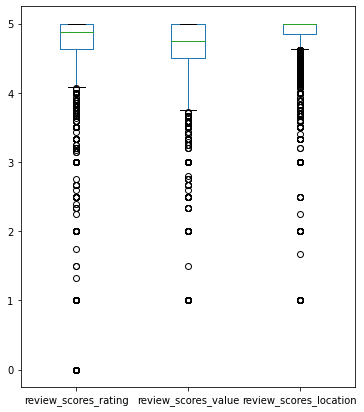

In [18]:
# Por se tratar de atributos de mesma ordem de grandeza, é possível estabelecer uma rápida relação entre eles,
# com auxílio do boxplot. Os três atributos possuem maior concentração de valores próxima a 5. 'review
# score location' possui o maior grupamento de dados, entre os três, visto que o tamanho da box é a menor
# sugerindo um baixo espalhamento dos dados. Uma análise mais minunciosa poderia avaliar a correlação estatística
# dos atributos, podendo sugerir avaliação via regressão linear, por exemplo, visto que mesmo que visualmente
# os dados se comportem de forma semelhante, não é possível confirmar que obrigatoriamente alta avaliação
# em 'review scores value' acarrete numa alta avaliação em 'review scores location'.

plt.figure(figsize=(6, 7))
df.boxplot(column=['review_scores_rating', 'review_scores_value', 'review_scores_location'], grid=False)

In [19]:
# Voltando à análise do room_type, vamos avaliar este atributo com mais detalhes.

df.room_type.value_counts()

Entire home/apt    17172
Private room        5841
Shared room          532
Hotel room            90
Name: room_type, dtype: int64

In [20]:
room_type_test = df.room_type
room_type_test

0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
23630    Entire home/apt
23631    Entire home/apt
23632    Entire home/apt
23633    Entire home/apt
23634    Entire home/apt
Name: room_type, Length: 23635, dtype: object

In [21]:
room_type_test.value_counts()

Entire home/apt    17172
Private room        5841
Shared room          532
Hotel room            90
Name: room_type, dtype: int64

In [48]:
# Para seguir com a análise, vamos manter apenas as variáveis numéricas, retirando as categóricas, exceto room_type,
# que é o foco de nosso interesse.

df_final = df.drop(["calculated_host_listings_count_shared_rooms", "calculated_host_listings_count_private_rooms",
                    "calculated_host_listings_count_entire_homes", "calculated_host_listings_count",
                   "instant_bookable", "license", "last_review", "first_review", "calendar_last_scraped", "availability_365", 
                   "availability_90", "availability_60", "availability_30", "has_availability", "calendar_updated",
                   "maximum_nights_avg_ntm", "minimum_nights_avg_ntm", "maximum_maximum_nights", "minimum_maximum_nights",
                   "maximum_minimum_nights", "minimum_minimum_nights", "maximum_nights", "minimum_nights", "price",
                   "amenities", "bathrooms_text", "accommodates", "property_type",
                   "longitude", "latitude", "neighbourhood_group_cleansed", "neighbourhood_cleansed",
                   "neighbourhood", "host_identity_verified", "host_has_profile_pic", "host_verifications",
                   "host_total_listings_count", "host_neighbourhood", "host_picture_url", "host_is_superhost",
                   "host_acceptance_rate", "host_response_rate", "host_response_time", "host_about", "host_location",
                   "host_since", "host_name", "host_url", "host_id", "picture_url", "neighborhood_overview",
                   "description", "name", "last_scraped", "scrape_id", "listing_url", "id", "host_thumbnail_url",], axis=1)

In [39]:
df_final.head()

,host_listings_count,room_type,bathrooms,bedrooms,beds,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2.0,Entire home/apt,NaN,2.0,2.0,265,14,1,4.68,4.78,4.63,4.82,4.90,4.76,4.65,2.11
1,0.0,Entire home/apt,NaN,1.0,1.0,85,0,0,4.73,4.83,4.78,4.90,4.90,4.97,4.58,0.88
2,3.0,Entire home/apt,NaN,1.0,2.0,238,0,0,4.68,4.65,4.76,4.77,4.90,4.81,4.56,1.89
3,1.0,Entire home/apt,NaN,1.0,1.0,181,0,0,4.72,4.85,4.63,4.85,4.88,4.90,4.65,1.97
4,1.0,Entire home/apt,NaN,1.0,1.0,363,31,2,4.90,4.93,4.93,4.96,4.94,4.93,4.87,3.05


In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23635 entries, 0 to 23634
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_listings_count          23628 non-null  float64
 1   room_type                    23635 non-null  object 
 2   bathrooms                    0 non-null      float64
 3   bedrooms                     22054 non-null  float64
 4   beds                         23407 non-null  float64
 5   number_of_reviews            23635 non-null  int64  
 6   number_of_reviews_ltm        23635 non-null  int64  
 7   number_of_reviews_l30d       23635 non-null  int64  
 8   review_scores_rating         14980 non-null  float64
 9   review_scores_accuracy       14501 non-null  float64
 10  review_scores_cleanliness    14502 non-null  float64
 11  review_scores_checkin        14501 non-null  float64
 12  review_scores_communication  14503 non-null  float64
 13  review_scores_lo

In [49]:
df_final.shape

(23635, 16)

In [50]:
# Preparando as variáveis para desenvolvimento das funções

x = df_final.drop(["room_type"], axis=1)
y = df_final.room_type

In [51]:
# Das opções de métodos para o f_classif da biblioteca Scikit learn foi escolhido

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import chi2

f_classif = SelectKBest(score_func=f_classif, k=8)
fit = f_classif.fit(x,y)
features = fit.transform(x)

print(features)

ValueError: ignored

In [28]:
# Identificando os atributos/features cujo índice foi True na classificação
# Os resultados retornaram um dataframe 23.635 x 8, o que correlaciona 'room_type' positivamente com os demais
# atributos do dataset

cols = fit.get_support(indices=True)
df.iloc[:,cols]

NameError: ignored

In [55]:
# Utilizando o mesmo dataframe df_final 1, foi feita uma cópia df_final 2
# a fim de realizar uma outra abordagem na análise dos dados

df_final2 == df_final

,host_listings_count,room_type,bathrooms,bedrooms,beds,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23630,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
23631,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
23632,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
23633,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [56]:
df_final2 = pd.isnull(df_final2)

In [58]:
df_final2.shape

(23635, 16)

In [59]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23635 entries, 0 to 23634
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   host_listings_count          23635 non-null  bool 
 1   room_type                    23635 non-null  bool 
 2   bathrooms                    23635 non-null  bool 
 3   bedrooms                     23635 non-null  bool 
 4   beds                         23635 non-null  bool 
 5   number_of_reviews            23635 non-null  bool 
 6   number_of_reviews_ltm        23635 non-null  bool 
 7   number_of_reviews_l30d       23635 non-null  bool 
 8   review_scores_rating         23635 non-null  bool 
 9   review_scores_accuracy       23635 non-null  bool 
 10  review_scores_cleanliness    23635 non-null  bool 
 11  review_scores_checkin        23635 non-null  bool 
 12  review_scores_communication  23635 non-null  bool 
 13  review_scores_location       23635 non-null  b

In [60]:
# A princípio a intenção seria utilizar o método f_classif da biblioteca Scikit-learn.
# Para tal, foram retirados os atributos não numéricos e valores vazios para um novo dataframe df_final2,
# o que atende as exigências para aplicação do SelectKBest() desta mesma biblioteca. Aplicando f_classif
# a fim de identificar os atributos que possuam maior pontuação, sendo atributos de maior contribuição para a 
# variável dependente, room_type, que desejamos explicar.

X = df_final2.drop(["room_type"], axis=1)
y = df_final2.room_type

In [61]:
# Mesmo variando o valor de k, o qual representa os atributos mais importantes, e posteriormente conseguir fazer um ranking
# de fatores que contribuem mais fortemente para a classificação do room_type, e os fatores que contribuem menos.

f_classif = SelectKBest(score_func=f_classif, k=16)
fit = f_classif.fit(X,y)
features = fit.transform(X)

# Visualizando as features:
print(features)

TypeError: ignored

In [62]:
# o método de validação do modelo escolhido foi o Chi2, o qual representa um método que a dependência e variáveis
# e descarta atributos que não irão interferir tanto na variável dependente.
# Em seguida, será necessário buscar com iloc[] as colunas as quais apresentam atributos relevantes para o estudo.

# Extração dos atributos
test = SelectKBest(chi2, k=8)
fit = test.fit(X, y)
features = fit.transform(X)
print(features)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


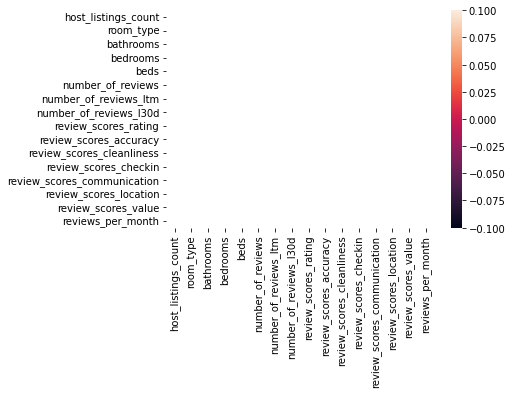

In [63]:
# Um mapa de calor foi gerado para visualizar o grau de correlação entre os atributos. Valores mais escuros
# representam correlação fraca, valores mais claros representam correlação forte, próxima de 1.
# De acordo com o mapa os 7 atributos de avaliações possuem correlação extremamente forte, principalmente
# 'review_per_month'.
# Pelo fato do 'room_type' ser uma variável nominal, não aparecem as correlações associadas a este atributo.
# uma sugestão do que pode ser feito neste caso, é associar um número para cada uma das categorias e rodar
# novamente o código de mapa de calor para avaliar a correlação entre os atributos, e seguir com teste de
# normalidade, testes de aderência, teste de hipóteses.

mask = np.triu(np.ones_like(df_final2.corr())) 
dataplot = sns.heatmap(df_final2.corr(), mask=mask) 
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


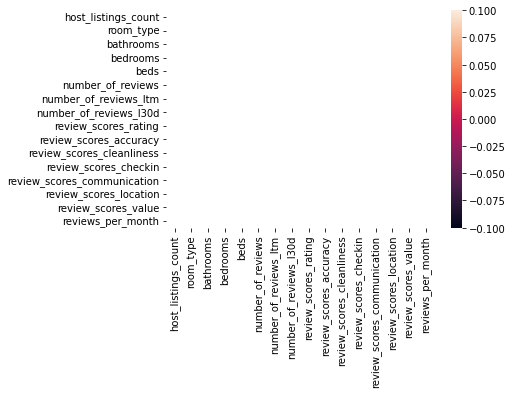

In [65]:
mask = np.triu(np.ones_like(df_final2.corr())) 
dataplot = sns.heatmap(df_final2.corr(), mask=mask) 
plt.show() 